<a href="https://colab.research.google.com/github/EunjaeHan/Stella/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_random_forest%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###필요한 라이브러리 설치

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

from sklearn import datasets

In [ ]:
# 필요한 라이브러리를 설치
!pip install pandas numpy matplotlib scikit-learn tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

###랜덤 포레스트

In [ ]:
#데이터 불러오기
deposit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deposit.csv')
transaction = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/transaction.csv')
cofix = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cofix.csv')

In [ ]:
data1=deposit

In [ ]:
data2=transaction

In [ ]:
data3=cofix

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 시계열 데이터를 훈련 데이터와 테스트 데이터로 나누기
train_size = int(len(data1) * 0.85)
train, test = data[:train_size], data[train_size:]

# 나눈 데이터 확인
print("Training Data:")
print(train)
print("\nTesting Data:")
print(test)


Training Data:
     seogu  bundang  pyeongtaek  paju  gimpo  hwaseong
0    -1.31     0.70       -1.52 -0.40  -2.56     -2.26
1    -0.70    -0.03       -0.30  0.06  -0.11     -0.75
2     0.73     0.83        0.70 -1.59  -0.13      0.59
3    -0.16     1.98        0.45  0.76   0.02     -0.62
4    -0.15     0.49        0.84  0.62   0.82     -0.17
..     ...      ...         ...   ...    ...       ...
198   0.63    -0.10        0.79 -0.13   0.02      0.73
199   0.45     0.24        0.94 -0.10   0.20      1.12
200   0.24     0.62        1.11 -0.14   0.06      1.48
201   1.16     0.75        0.96 -0.07   0.15      1.56
202   1.46     1.01        0.53 -0.12   0.17      1.75

[203 rows x 6 columns]

Testing Data:
     seogu  bundang  pyeongtaek  paju  gimpo  hwaseong
203   1.62     0.87        0.79  0.01   0.81      1.64
204   1.67     2.05        0.68  1.36   3.17      1.04
205   1.53     1.72        0.44  0.88   0.68      0.37
206   1.80     1.01        1.28  0.98   1.09      0.63
207   1.89 

In [ ]:
cv_scores = []
estimator_list =[i for i in range(0,50,1)]
for i in tqdm(range(0,50,1)):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=2021)
    score = cross_val_score(rfc, X_train, y_train, cv=10, scoring = 'accuracy').mean()
    cv_scores.append(score)

best_e = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
plt.figure(figsize=(20,10))
plt.legend(["Cross validation scores"], fontsize=20)
plt.plot(estimator_list,cv_scores, marker='o', linestyle='dashed')
plt.xlabel("the number of trees", fontsize=20 )
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy Score", fontsize=25)
plt.axvline(best_e[0], color='r', linestyle='--', linewidth=2)
plt.show()

NameError: ignored

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 예제 데이터 생성
np.data1(42)
X = np.random.rand(100, 1)  # 독립 변수 (특성)
y = 2 * X.squeeze() + 1 + 0.1 * np.random.randn(100)  # 종속 변수

# 데이터를 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성 및 훈련
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = rf_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

AttributeError: ignored

In [ ]:
from datetime import datetime   # 패키지 - 모듈 (이름 같음)
import pandas as pd   # csv file read
import matplotlib.pyplot as plt   # 시계열 시각화

cofix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    166 non-null    object 
 1   cofix   166 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB


In [ ]:
cofix.index # 행 이름 : RangeIndex(start=0, stop=247, step=1)
cofix.head()

,date,cofix
0,2010-01-10,3.88
1,2010-02-10,3.62
2,2010-03-10,3.26
3,2010-04-10,2.86
4,2010-05-10,2.89


In [ ]:
new_cofix = cofix.set_index('date')
new_cofix.head()

,cofix
date,
2010-01-10,3.88
2010-02-10,3.62
2010-03-10,3.26
2010-04-10,2.86
2010-05-10,2.89


In [ ]:
# subset 생성
new_cofix_HL = new_cofix[['cofix']]
new_cofix_HL.head()

,cofix
date,
2010-01-10,3.88
2010-02-10,3.62
2010-03-10,3.26
2010-04-10,2.86
2010-05-10,2.89


<Axes: title={'center': 'Trend line of High column'}>

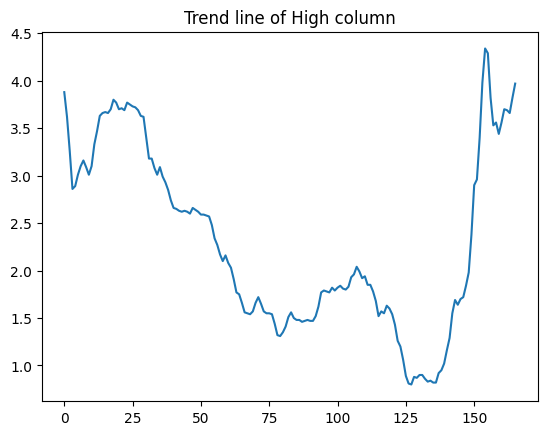

In [ ]:
cofix['cofix'].plot(title = 'Trend line of High column')

In [ ]:
cofix.index # 행 이름 : RangeIndex(start=0, stop=247, step=1)
cofix.head()

,date,cofix
0,2010-01-10,3.88
1,2010-02-10,3.62
2,2010-03-10,3.26
3,2010-04-10,2.86
4,2010-05-10,2.89


In [ ]:
# 특정 칼럼 -> index 지정
new_cofix = cofix.set_index('date')
new_cofix.head()

,cofix
date,
2010-01-10,3.88
2010-02-10,3.62
2010-03-10,3.26
2010-04-10,2.86
2010-05-10,2.89


In [ ]:
# subset 생성
new_cofix_HL = new_cofix[['cofix']]
new_cofix_HL.head()

,cofix
date,
2010-01-10,3.88
2010-02-10,3.62
2010-03-10,3.26
2010-04-10,2.86
2010-05-10,2.89


In [ ]:
# 평활 : 지정한 날짜 단위 평균 -> 이동 roll_mean5 = pd.Series.rolling(new_cospi_HL['High'], window=5, center = False).mean()
roll_mean10 = pd.Series.rolling(new_cospi_HL['High'], window=10, center = False).mean()
roll_mean20 = pd.Series.rolling(new_cospi_HL['High'], window=20, center = False).mean()

# window는 단위 - 5일 단위, 10일 단위, 20일 단위
